# UIDAI Data Hackathon 2026  
## End-to-End Aadhaar Enrolment & Update Analysis


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


### Phase I — Data cleaning and Preparation

## Enrolment Dataset Cleaning


In [87]:
enrolment_path = "../data_raw/enrolment/"
enrolment_files = [f for f in os.listdir(enrolment_path) if f.endswith(".csv")]

enrolment_files


['api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv']

In [88]:
df_enrolment = pd.concat(
    [pd.read_csv(enrolment_path + f) for f in enrolment_files],
    ignore_index=True
)

df_enrolment.shape


(1006029, 7)

In [89]:
df_enrolment.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [90]:
df_enrolment.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [91]:
df_enrolment.isna().sum()


date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [92]:
df_enrolment.columns = df_enrolment.columns.str.strip().str.lower()
df_enrolment.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [93]:
df_enrolment['date'] = pd.to_datetime(
    df_enrolment['date'],
    dayfirst=True,
    errors='coerce'
)



In [94]:
df_enrolment['date'].isna().sum()


0

In [95]:
df_enrolment['date'].min(), df_enrolment['date'].max()


(Timestamp('2025-03-02 00:00:00'), Timestamp('2025-12-31 00:00:00'))

In [96]:
df_enrolment['state_clean'] = (
    df_enrolment['state']
    .str.lower()
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

df_enrolment['state_clean'].nunique()


48

In [97]:
sorted(df_enrolment['state_clean'].unique())


['100000',
 'andaman & nicobar islands',
 'andaman and nicobar islands',
 'andhra pradesh',
 'arunachal pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra & nagar haveli',
 'dadra and nagar haveli',
 'dadra and nagar haveli and daman and diu',
 'daman & diu',
 'daman and diu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal pradesh',
 'jammu & kashmir',
 'jammu and kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'orissa',
 'pondicherry',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil nadu',
 'telangana',
 'the dadra and nagar haveli and daman and diu',
 'tripura',
 'uttar pradesh',
 'uttarakhand',
 'west bangal',
 'west bengal',
 'westbengal']

In [98]:
# Drop invalid numeric state entries
df_enrolment = df_enrolment[~df_enrolment['state_clean'].str.isnumeric()]

# State normalization map (ONLY based on observed values)
state_map = {
    # Andaman & Nicobar
    'andaman & nicobar islands': 'andaman and nicobar islands',

    # Dadra & Nagar Haveli + Daman & Diu (merged UT)
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman & diu': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',

    # Jammu & Kashmir
    'jammu & kashmir': 'jammu and kashmir',

    # West Bengal
    'westbengal': 'west bengal'
}

df_enrolment['state_clean'] = df_enrolment['state_clean'].replace(state_map)

df_enrolment['state_clean'].nunique()



40

In [99]:
# Drop invalid numeric state entries
df_enrolment = df_enrolment[~df_enrolment['state_clean'].str.isnumeric()]

# State normalization map (ONLY based on observed values)
state_map = {
    # Andaman & Nicobar
    'andaman & nicobar islands': 'andaman and nicobar islands',

    # Dadra & Nagar Haveli + Daman & Diu (merged UT)
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman & diu': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',

    # Jammu & Kashmir
    'jammu & kashmir': 'jammu and kashmir',

    # West Bengal
    'westbengal': 'west bengal'
}

df_enrolment['state_clean'] = df_enrolment['state_clean'].replace(state_map)

df_enrolment['state_clean'].nunique()


40

In [100]:
sorted(df_enrolment['state_clean'].value_counts().tail(15).index.tolist())


['andaman and nicobar islands',
 'arunachal pradesh',
 'chandigarh',
 'dadra and nagar haveli and daman and diu',
 'goa',
 'ladakh',
 'lakshadweep',
 'manipur',
 'mizoram',
 'nagaland',
 'pondicherry',
 'puducherry',
 'sikkim',
 'the dadra and nagar haveli and daman and diu',
 'west bangal']

In [101]:
final_state_map = {
    # Pondicherry naming
    'pondicherry': 'puducherry',

    # Extra article issue
    'the dadra and nagar haveli and daman and diu': 
    'dadra and nagar haveli and daman and diu',

    # Spelling mistake
    'west bangal': 'west bengal'
}

df_enrolment['state_clean'] = df_enrolment['state_clean'].replace(final_state_map)

df_enrolment['state_clean'].nunique()


37

In [102]:
sorted(df_enrolment['state_clean'].value_counts().tail(15).index.tolist())


['andaman and nicobar islands',
 'arunachal pradesh',
 'chandigarh',
 'dadra and nagar haveli and daman and diu',
 'goa',
 'ladakh',
 'lakshadweep',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'orissa',
 'puducherry',
 'sikkim',
 'tripura']

In [103]:
state_counts = df_enrolment['state_clean'].value_counts()
state_counts[state_counts < 1000]


state_clean
chandigarh                                  859
dadra and nagar haveli and daman and diu    416
andaman and nicobar islands                 392
ladakh                                      304
lakshadweep                                 159
Name: count, dtype: int64

In [104]:
df_enrolment.to_csv("../data_clean/enrolment_clean.csv", index=False)


KeyboardInterrupt: 

## Demographic Dataset Cleaning



In [ ]:
demographic_path = "../data_raw/demographic/"
demographic_files = [f for f in os.listdir(demographic_path) if f.endswith(".csv")]

demographic_files


['api_data_aadhar_demographic_0_500000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_500000_1000000.csv']

In [ ]:
df_demo = pd.concat(
    [pd.read_csv(demographic_path + f) for f in demographic_files],
    ignore_index=True
)

df_demo.shape


(2071700, 6)

In [ ]:
df_demo.head()
df_demo.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [ ]:
df_demo['date'] = pd.to_datetime(
    df_demo['date'],
    dayfirst=True,
    errors='coerce'
)

df_demo['date'].isna().sum()
df_demo['date'].min(), df_demo['date'].max()


(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-29 00:00:00'))

In [ ]:
df_demo['year'] = df_demo['date'].dt.year
df_demo['month'] = df_demo['date'].dt.to_period('M')


In [ ]:
df_demo['state_clean'] = (
    df_demo['state']
    .str.lower()
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

df_demo['state_clean'].nunique()


57

In [ ]:
sorted(df_demo['state_clean'].unique())


['100000',
 'andaman & nicobar islands',
 'andaman and nicobar islands',
 'andhra pradesh',
 'arunachal pradesh',
 'assam',
 'balanagar',
 'bihar',
 'chandigarh',
 'chhatisgarh',
 'chhattisgarh',
 'dadra & nagar haveli',
 'dadra and nagar haveli',
 'dadra and nagar haveli and daman and diu',
 'daman & diu',
 'daman and diu',
 'darbhanga',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal pradesh',
 'jaipur',
 'jammu & kashmir',
 'jammu and kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madanapalle',
 'madhya pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'nagpur',
 'odisha',
 'orissa',
 'pondicherry',
 'puducherry',
 'punjab',
 'puttenahalli',
 'raja annamalai puram',
 'rajasthan',
 'sikkim',
 'tamil nadu',
 'telangana',
 'tripura',
 'uttar pradesh',
 'uttarakhand',
 'uttaranchal',
 'west bangal',
 'west bengal',
 'west bengli',
 'westbengal']

In [ ]:
df_demo = df_demo[~df_demo['state_clean'].str.isnumeric()]
df_demo['state_clean'].nunique()


56

In [ ]:
demo_state_map = {
    # Andaman & Nicobar
    'andaman & nicobar islands': 'andaman and nicobar islands',

    # Dadra & Nagar Haveli + Daman & Diu
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman & diu': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'the dadra and nagar haveli and daman and diu':
        'dadra and nagar haveli and daman and diu',

    # Jammu & Kashmir
    'jammu & kashmir': 'jammu and kashmir',

    # Puducherry
    'pondicherry': 'puducherry',

    # Odisha
    'orissa': 'odisha',

    # Telangana
    'telengana': 'telangana',

    # Uttarakhand
    'uttaranchal': 'uttarakhand',

    # West Bengal
    'west bangal': 'west bengal',
    'westbengal': 'west bengal',

    # Delhi
    'nct of delhi': 'delhi'
}

df_demo['state_clean'] = df_demo['state_clean'].replace(demo_state_map)
df_demo['state_clean'].nunique()


45

In [ ]:
df_demo['state_clean'].value_counts().tail(20)


state_clean
meghalaya                                   5363
puducherry                                  4886
arunachal pradesh                           4726
nagaland                                    4035
mizoram                                     3840
sikkim                                      3219
chandigarh                                  2044
andaman and nicobar islands                 1724
dadra and nagar haveli and daman and diu    1627
ladakh                                       865
lakshadweep                                  520
chhatisgarh                                    4
west bengli                                    3
darbhanga                                      2
balanagar                                      2
jaipur                                         2
madanapalle                                    2
puttenahalli                                   1
nagpur                                         1
raja annamalai puram                           1
Name: co

In [ ]:
# 1. Fix spelling mistakes
final_demo_state_map = {
    'chhatisgarh': 'chhattisgarh',
    'west bengli': 'west bengal'
}

df_demo['state_clean'] = df_demo['state_clean'].replace(final_demo_state_map)

# 2. Remove entries that are clearly districts/localities, not states
invalid_states = [
    'darbhanga',
    'balanagar',
    'jaipur',
    'madanapalle',
    'puttenahalli',
    'nagpur',
    'raja annamalai puram'
]

df_demo = df_demo[~df_demo['state_clean'].isin(invalid_states)]

# 3. Check final unique state count
df_demo['state_clean'].nunique()


36

In [ ]:
df_demo.to_csv("../data_clean/demographic_clean.csv", index=False)


## Biometric Dataset Cleaning



In [ ]:
biometric_path = "../data_raw/biometric/"
biometric_files = [f for f in os.listdir(biometric_path) if f.endswith(".csv")]

biometric_files


['api_data_aadhar_biometric_0_500000.csv',
 'api_data_aadhar_biometric_1000000_1500000.csv',
 'api_data_aadhar_biometric_1500000_1861108.csv',
 'api_data_aadhar_biometric_500000_1000000.csv']

In [ ]:
df_bio = pd.concat(
    [pd.read_csv(biometric_path + f) for f in biometric_files],
    ignore_index=True
)

df_bio.shape


(1861108, 6)

In [ ]:
df_bio.head()
df_bio.columns


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [ ]:
df_bio['date'] = pd.to_datetime(
    df_bio['date'],
    dayfirst=True,
    errors='coerce'
)

df_bio['date'].isna().sum()
df_bio['date'].min(), df_bio['date'].max()


(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-29 00:00:00'))

In [ ]:
df_bio['year'] = df_bio['date'].dt.year
df_bio['month'] = df_bio['date'].dt.to_period('M')


In [ ]:
df_bio['state_clean'] = (
    df_bio['state']
    .str.lower()
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

df_bio['state_clean'].nunique()


49

In [ ]:
df_bio['state_clean'].value_counts().tail(20)


state_clean
mizoram                                     3349
puducherry                                  2608
sikkim                                      2400
pondicherry                                 2310
chandigarh                                  1656
andaman and nicobar islands                 1298
ladakh                                       733
lakshadweep                                  550
andaman & nicobar islands                    549
daman and diu                                412
jammu & kashmir                              370
dadra and nagar haveli                       325
daman & diu                                  264
dadra and nagar haveli and daman and diu     224
dadra & nagar haveli                         100
west bangal                                   51
westbengal                                    29
chhatisgarh                                    5
uttaranchal                                    2
tamilnadu                                      1
Name: co

In [ ]:
df_bio = df_bio[~df_bio['state_clean'].str.isnumeric()]
df_bio['state_clean'].nunique()


49

In [ ]:
bio_state_map = {
    # Andaman & Nicobar
    'andaman & nicobar islands': 'andaman and nicobar islands',

    # Dadra & Nagar Haveli + Daman & Diu
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman & diu': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'the dadra and nagar haveli and daman and diu':
        'dadra and nagar haveli and daman and diu',

    # Jammu & Kashmir
    'jammu & kashmir': 'jammu and kashmir',

    # Puducherry
    'pondicherry': 'puducherry',

    # Odisha
    'orissa': 'odisha',

    # Telangana
    'telengana': 'telangana',

    # Uttarakhand
    'uttaranchal': 'uttarakhand',

    # West Bengal
    'west bangal': 'west bengal',
    'westbengal': 'west bengal',

    # Delhi
    'nct of delhi': 'delhi'
}

df_bio['state_clean'] = df_bio['state_clean'].replace(bio_state_map)
df_bio['state_clean'].nunique()


38

In [ ]:
df_bio.to_csv("../data_clean/biometric_clean.csv", index=False)


### Phase 2 – Working Tables


## Phase 2.1 – Enrolment State–Month Working Table


In [ ]:
# Reload clean enrolment data
df_enrol = pd.read_csv("../data_clean/enrolment_clean.csv")

# Robust date parsing (mixed formats)
df_enrol['date'] = pd.to_datetime(
    df_enrol['date'],
    dayfirst=True,
    errors='coerce'
)

# Keep only rows with valid dates (for time analysis)
df_enrol = df_enrol[df_enrol['date'].notna()].copy()

# Create month column AFTER filtering
df_enrol['month'] = df_enrol['date'].dt.strftime('%Y-%m')

# Create total enrolment column
df_enrol['total_enrolment'] = (
    df_enrol['age_0_5'] +
    df_enrol['age_5_17'] +
    df_enrol['age_18_greater']
)

# Sanity check
df_enrol.columns



Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'state_clean', 'month', 'total_enrolment'],
      dtype='object')

In [ ]:
state_month_enrol = (
    df_enrol
    .groupby(['state_clean', 'month'], as_index=False)
    .agg({
        'total_enrolment': 'sum',
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'
    })
)

state_month_enrol.head()


,state_clean,month,total_enrolment,age_0_5,age_5_17,age_18_greater
0,andaman and nicobar islands,2025-01,30,27,3,0
1,andaman and nicobar islands,2025-02,12,11,1,0
2,andaman and nicobar islands,2025-03,15,14,1,0
3,andaman and nicobar islands,2025-04,17,16,1,0
4,andaman and nicobar islands,2025-05,9,9,0,0


In [ ]:
state_month_enrol.shape


(444, 6)

In [ ]:
state_month_enrol.to_csv("../outputs/state_month_enrolment.csv", index=False)


## Phase 2.2 – Demographic State–Month Working Table


In [ ]:
# Load clean demographic data
df_demo = pd.read_csv("../data_clean/demographic_clean.csv")

df_demo.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'year', 'month', 'state_clean'],
      dtype='object')

In [ ]:
df_demo['date'] = pd.to_datetime(
    df_demo['date'],
    dayfirst=True,
    errors='coerce'
)

df_demo['date'].isna().sum(), df_demo['date'].min(), df_demo['date'].max()


(1187955, Timestamp('2025-01-03 00:00:00'), Timestamp('2025-12-12 00:00:00'))

In [ ]:
df_demo = df_demo[df_demo['date'].notna()].copy()
df_demo.shape


(883732, 9)

In [ ]:
df_demo['month'] = df_demo['date'].dt.strftime('%Y-%m')
df_demo[['date', 'month']].head()


,date,month
0,2025-01-03,2025-01
1,2025-01-03,2025-01
2,2025-01-03,2025-01
3,2025-01-03,2025-01
4,2025-01-03,2025-01


In [ ]:
state_month_demo = (
    df_demo
    .groupby(['state_clean', 'month'], as_index=False)
    .agg({
        'demo_age_5_17': 'sum',
        'demo_age_17_': 'sum'
    })
)

state_month_demo.head()


,state_clean,month,demo_age_5_17,demo_age_17_
0,andaman and nicobar islands,2025-01,180,1839
1,andaman and nicobar islands,2025-02,26,216
2,andaman and nicobar islands,2025-03,23,362
3,andaman and nicobar islands,2025-04,13,225
4,andaman and nicobar islands,2025-05,19,157


In [ ]:
state_month_demo.shape


(432, 4)

In [ ]:
state_month_demo.to_csv("../outputs/state_month_demographic.csv", index=False)


## Phase 2.3 – Biometric State–Month Working Table

In [ ]:
# Load clean biometric data
df_bio = pd.read_csv("../data_clean/biometric_clean.csv")

df_bio.columns


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'year', 'month', 'state_clean'],
      dtype='object')

In [ ]:
df_bio['date'] = pd.to_datetime(
    df_bio['date'],
    dayfirst=True,
    errors='coerce'
)

df_bio['date'].isna().sum(), df_bio['date'].min(), df_bio['date'].max()


(944100, Timestamp('2025-01-03 00:00:00'), Timestamp('2025-12-12 00:00:00'))

In [ ]:
df_bio = df_bio[df_bio['date'].notna()].copy()
df_bio.shape


(917008, 9)

In [ ]:
df_bio['month'] = df_bio['date'].dt.strftime('%Y-%m')
df_bio[['date', 'month']].head()


,date,month
0,2025-01-03,2025-01
1,2025-01-03,2025-01
2,2025-01-03,2025-01
3,2025-01-03,2025-01
4,2025-01-03,2025-01


In [ ]:
state_month_bio = (
    df_bio
    .groupby(['state_clean', 'month'], as_index=False)
    .agg({
        'bio_age_5_17': 'sum',
        'bio_age_17_': 'sum'
    })
)

state_month_bio.head()


,state_clean,month,bio_age_5_17,bio_age_17_
0,andaman and nicobar islands,2025-01,6467,6083
1,andaman and nicobar islands,2025-02,349,167
2,andaman and nicobar islands,2025-03,239,129
3,andaman and nicobar islands,2025-04,229,108
4,andaman and nicobar islands,2025-05,247,105


In [ ]:
state_month_bio.shape


(435, 4)

In [ ]:
state_month_bio.to_csv("../outputs/state_month_biometric.csv", index=False)


### Phase 3 - Insights



Master State–Month Table

In [ ]:
# Load working tables
enrol = pd.read_csv("../outputs/state_month_enrolment.csv")
demo = pd.read_csv("../outputs/state_month_demographic.csv")
bio = pd.read_csv("../outputs/state_month_biometric.csv")

# Merge enrolment + demographic
master = enrol.merge(
    demo,
    on=['state_clean', 'month'],
    how='left'
)

# Merge biometric
master = master.merge(
    bio,
    on=['state_clean', 'month'],
    how='left'
)

master.head()


,state_clean,month,total_enrolment,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_
0,andaman and nicobar islands,2025-01,30,27,3,0,180.0,1839.0,6467.0,6083.0
1,andaman and nicobar islands,2025-02,12,11,1,0,26.0,216.0,349.0,167.0
2,andaman and nicobar islands,2025-03,15,14,1,0,23.0,362.0,239.0,129.0
3,andaman and nicobar islands,2025-04,17,16,1,0,13.0,225.0,229.0,108.0
4,andaman and nicobar islands,2025-05,9,9,0,0,19.0,157.0,247.0,105.0


In [ ]:
master.shape


(444, 10)

#### Insight 1 - What kind of Aadhaar activity is happening in different regions?

In [ ]:
master['total_updates'] = (
    master['demo_age_5_17'].fillna(0) +
    master['demo_age_17_'].fillna(0) +
    master['bio_age_5_17'].fillna(0) +
    master['bio_age_17_'].fillna(0)
)


In [ ]:
master['update_enrol_ratio'] = (
    master['total_updates'] / master['total_enrolment']
)
master['update_enrol_ratio'] = master['update_enrol_ratio'].replace([float('inf')], 0)


In [ ]:
master[['state_clean', 'month', 'total_enrolment', 'total_updates', 'update_enrol_ratio']].head()


,state_clean,month,total_enrolment,total_updates,update_enrol_ratio
0,andaman and nicobar islands,2025-01,30,14569.0,485.633333
1,andaman and nicobar islands,2025-02,12,758.0,63.166667
2,andaman and nicobar islands,2025-03,15,753.0,50.200000
3,andaman and nicobar islands,2025-04,17,575.0,33.823529
4,andaman and nicobar islands,2025-05,9,528.0,58.666667


In [ ]:
master.sort_values(
    'update_enrol_ratio',
    ascending=False
).head(15)


,state_clean,month,total_enrolment,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,total_updates,update_enrol_ratio
216,lakshadweep,2025-01,3,3,0,0,0.0,26.0,1294.0,1773.0,3093.0,1031.000000
144,himachal pradesh,2025-01,303,238,29,36,6074.0,37089.0,91788.0,142013.0,276964.0,914.072607
60,chandigarh,2025-01,150,117,23,10,10537.0,46477.0,41585.0,17960.0,116559.0,777.060000
12,andhra pradesh,2025-01,5408,3892,1179,337,125870.0,875509.0,1540426.0,875186.0,3416991.0,631.840052
108,goa,2025-01,105,67,23,15,1311.0,7130.0,19206.0,23874.0,51521.0,490.676190
0,andaman and nicobar islands,2025-01,30,27,3,0,180.0,1839.0,6467.0,6083.0,14569.0,485.633333
192,kerala,2025-01,2478,1363,912,203,11650.0,112607.0,444601.0,627966.0,1196824.0,482.979822
300,odisha,2025-01,4647,3551,1050,46,44701.0,358909.0,713305.0,876605.0,1993520.0,428.990747
204,ladakh,2025-01,15,10,5,0,763.0,1874.0,1386.0,2179.0,6202.0,413.466667
372,tamil nadu,2025-01,9842,7640,1858,344,62099.0,614254.0,1212984.0,1633833.0,3523170.0,357.972973


In [ ]:
master.sort_values(
    'total_enrolment',
    ascending=False
).head(15)


,state_clean,month,total_enrolment,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,total_updates,update_enrol_ratio
408,uttar pradesh,2025-01,329909,160688,160206,9015,260596.0,3013244.0,3864019.0,2055116.0,9192975.0,27.865184
48,bihar,2025-01,176378,64473,104798,7107,109257.0,1144095.0,1547373.0,1726934.0,4527659.0,25.670203
120,gujarat,2025-01,119113,68902,39809,10402,108798.0,734834.0,1028050.0,1234349.0,3106031.0,26.076339
228,madhya pradesh,2025-01,116898,69536,42956,4406,249933.0,1436150.0,2385083.0,1873884.0,5945050.0,50.856730
36,assam,2025-01,100641,55627,31225,13789,25109.0,261444.0,319234.0,180583.0,786370.0,7.813615
240,maharashtra,2025-01,90417,58991,27449,3977,94780.0,1107691.0,1738826.0,3407643.0,6348940.0,70.218432
264,meghalaya,2025-01,86415,16257,43911,26247,3456.0,37632.0,21117.0,39825.0,102030.0,1.180698
348,rajasthan,2025-01,60656,38899,20081,1676,117685.0,1498232.0,1040427.0,1229606.0,3885950.0,64.065385
432,west bengal,2025-01,56332,31596,21339,3397,77963.0,1012727.0,655886.0,905667.0,2652243.0,47.082351
180,karnataka,2025-01,46370,28244,11740,6386,148284.0,620392.0,796231.0,912181.0,2477088.0,53.420056


In [106]:

state_totals = (
    state_month_enrol
    .groupby("state_clean", as_index=False)
    .agg(total_enrolment=("total_enrolment", "sum"))
)

demo_totals = (
    state_month_demo
    .groupby("state_clean", as_index=False)
    .agg(
        demo_updates_5_17=("demo_age_5_17", "sum"),
        demo_updates_17_plus=("demo_age_17_", "sum")
    )
)

demo_totals["total_demo_updates"] = (
    demo_totals["demo_updates_5_17"] +
    demo_totals["demo_updates_17_plus"]
)

bio_totals = (
    state_month_bio
    .groupby("state_clean", as_index=False)
    .agg(
        bio_updates_5_17=("bio_age_5_17", "sum"),
        bio_updates_17_plus=("bio_age_17_", "sum")
    )
)

bio_totals["total_bio_updates"] = (
    bio_totals["bio_updates_5_17"] +
    bio_totals["bio_updates_17_plus"]
)


df_lifecycle = (
    state_totals
    .merge(
        demo_totals[["state_clean", "total_demo_updates"]],
        on="state_clean",
        how="left"
    )
    .merge(
        bio_totals[["state_clean", "total_bio_updates"]],
        on="state_clean",
        how="left"
    )
)

df_lifecycle[["total_demo_updates", "total_bio_updates"]] = (
    df_lifecycle[["total_demo_updates", "total_bio_updates"]].fillna(0)
)

df_lifecycle["update_to_enrolment_ratio"] = (
    (df_lifecycle["total_demo_updates"] + df_lifecycle["total_bio_updates"])
    / df_lifecycle["total_enrolment"]
)

df_lifecycle = df_lifecycle.sort_values(
    "update_to_enrolment_ratio", ascending=True
)

df_lifecycle.head()


,state_clean,total_enrolment,total_demo_updates,total_bio_updates,update_to_enrolment_ratio
26,orissa,1306,0.0,0.0,0.000000
22,meghalaya,94116,62981.0,73206.0,1.447012
3,assam,145039,583036.0,707125.0,8.895270
24,nagaland,11266,22323.0,88929.0,9.875022
4,bihar,302969,2901110.0,4043799.0,22.922837


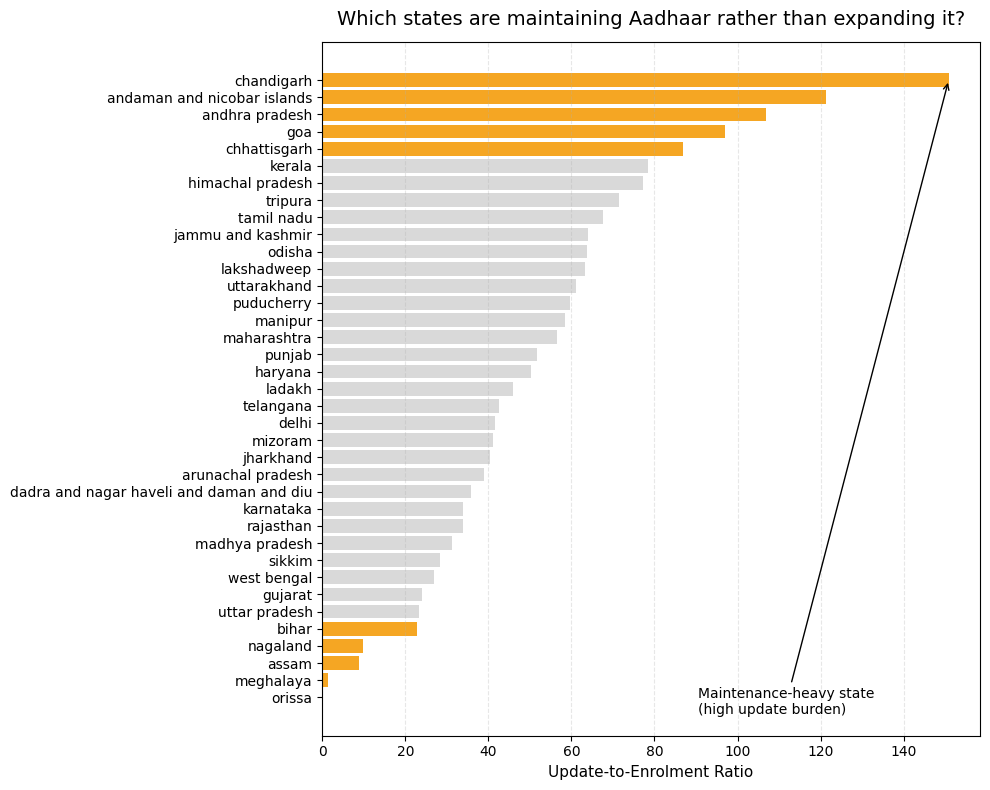

In [ ]:
# Colors
BASE_GREY = "#d9d9d9"
AADHAAR_ORANGE = "#f5a623"

# Highlight top & bottom states
highlight_states = (
    df_lifecycle.head(5)["state_clean"].tolist()
    + df_lifecycle.tail(5)["state_clean"].tolist()
)

colors = [
    AADHAAR_ORANGE if s in highlight_states else BASE_GREY
    for s in df_lifecycle["state_clean"]
]

plt.figure(figsize=(10, 8))

plt.barh(
    df_lifecycle["state_clean"],
    df_lifecycle["update_to_enrolment_ratio"],
    color=colors
)

plt.title(
    "Which states are maintaining Aadhaar rather than expanding it?",
    fontsize=14,
    pad=12
)

plt.xlabel("Update-to-Enrolment Ratio", fontsize=11)
plt.ylabel("")

plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()

# Annotation
top_state = df_lifecycle.tail(1).iloc[0]

plt.annotate(
    "Maintenance-heavy state\n(high update burden)",
    xy=(top_state["update_to_enrolment_ratio"], top_state["state_clean"]),
    xytext=(top_state["update_to_enrolment_ratio"] * 0.6, -1),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10
)

plt.show()


#### Insight 2 - Does Aadhaar activity behave the same every month, or are there system-wide seasonal patterns?

In [ ]:
national_monthly = (
    master
    .groupby('month', as_index=False)
    .agg({
        'total_enrolment': 'sum',
        'total_updates': 'sum'
    })
)

national_monthly


,month,total_enrolment,total_updates
0,2025-01,1366494,63094861.0
1,2025-02,176673,2354269.0
2,2025-03,103519,2387025.0
3,2025-04,66356,2429927.0
4,2025-05,101662,1655092.0
5,2025-06,102542,2265757.0
6,2025-07,56988,1403885.0
7,2025-08,135743,2718893.0
8,2025-09,140130,2074506.0
9,2025-10,151285,2402511.0


In [ ]:
national_monthly['update_share'] = (
    national_monthly['total_updates'] /
    (national_monthly['total_updates'] + national_monthly['total_enrolment'])
)


In [ ]:
national_monthly[['month', 'total_enrolment', 'total_updates', 'update_share']]


,month,total_enrolment,total_updates,update_share
0,2025-01,1366494,63094861.0,0.978801
1,2025-02,176673,2354269.0,0.930195
2,2025-03,103519,2387025.0,0.958435
3,2025-04,66356,2429927.0,0.973418
4,2025-05,101662,1655092.0,0.942131
5,2025-06,102542,2265757.0,0.956702
6,2025-07,56988,1403885.0,0.960990
7,2025-08,135743,2718893.0,0.952448
8,2025-09,140130,2074506.0,0.936725
9,2025-10,151285,2402511.0,0.940761


In [105]:

national_month_enrol = (
    state_month_enrol
    .groupby("month", as_index=False)
    .agg(total_enrolment=("total_enrolment", "sum"))
)

# Sort chronologically
national_month_enrol["month"] = pd.to_datetime(national_month_enrol["month"])
national_month_enrol = national_month_enrol.sort_values("month")




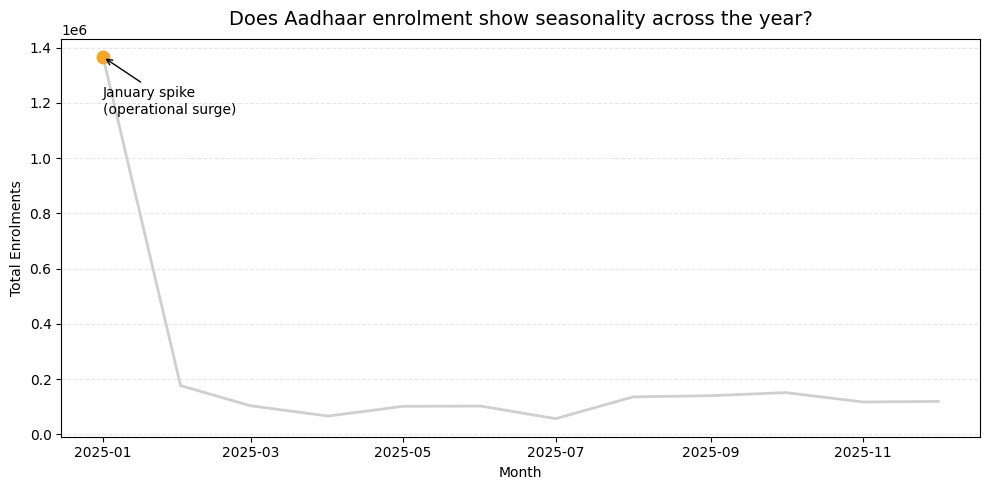

In [85]:
BASE_GREY = "#cfcfcf"
AADHAAR_ORANGE = "#f5a623"

plt.figure(figsize=(10, 5))

plt.plot(
    national_month_enrol["month"],
    national_month_enrol["total_enrolment"],
    color=BASE_GREY,
    linewidth=2
)

# Highlight January
jan_data = national_month_enrol[
    national_month_enrol["month"].dt.month == 1
]

plt.scatter(
    jan_data["month"],
    jan_data["total_enrolment"],
    color=AADHAAR_ORANGE,
    s=80,
    zorder=3
)

plt.title(
    "Does Aadhaar enrolment show seasonality across the year?",
    fontsize=14,
    pad=10
)

plt.xlabel("Month")
plt.ylabel("Total Enrolments")

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

# Annotation
plt.annotate(
    "January spike\n(operational surge)",
    xy=(jan_data.iloc[0]["month"], jan_data.iloc[0]["total_enrolment"]),
    xytext=(jan_data.iloc[0]["month"], jan_data.iloc[0]["total_enrolment"] * 0.85),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10
)

plt.show()


#### Insight 3 - Are there states whose Aadhaar update behavior is consistently abnormal compared to the national pattern?

In [71]:
state_behavior = (
    master
    .groupby('state_clean', as_index=False)
    .agg({
        'update_enrol_ratio': 'mean',
        'total_enrolment': 'sum',
        'total_updates': 'sum'
    })
)

state_behavior.head()


,state_clean,update_enrol_ratio,total_enrolment,total_updates
0,andaman and nicobar islands,91.261275,173,20970.0
1,andhra pradesh,82.185136,41948,4486126.0
2,arunachal pradesh,26.355107,2027,78755.0
3,assam,11.710708,145039,1290161.0
4,bihar,20.946267,302969,6944909.0


In [72]:
state_behavior.sort_values(
    'update_enrol_ratio',
    ascending=False
).head(10)


,state_clean,update_enrol_ratio,total_enrolment,total_updates
18,lakshadweep,110.225275,67,4241.0
12,himachal pradesh,102.327036,5114,394580.0
5,chandigarh,91.670477,890,134258.0
0,andaman and nicobar islands,91.261275,173,20970.0
1,andhra pradesh,82.185136,41948,4486126.0
16,kerala,77.668142,21678,1701965.0
9,goa,75.986724,773,75046.0
21,manipur,67.495568,6517,380782.0
25,odisha,54.925741,41999,2679063.0
31,tamil nadu,53.633435,74674,5050561.0


In [73]:
state_behavior.sort_values(
    'update_enrol_ratio',
    ascending=True
).head(10)


,state_clean,update_enrol_ratio,total_enrolment,total_updates
26,orissa,0.000000,1306,0.0
22,meghalaya,4.717182,94116,136187.0
3,assam,11.710708,145039,1290161.0
24,nagaland,15.296785,11266,111252.0
19,madhya pradesh,15.809653,232899,7287043.0
34,uttar pradesh,18.595715,557687,13053315.0
29,rajasthan,19.093844,154860,5250103.0
36,west bengal,19.813229,164867,4439514.0
15,karnataka,20.568548,97668,3314936.0
4,bihar,20.946267,302969,6944909.0


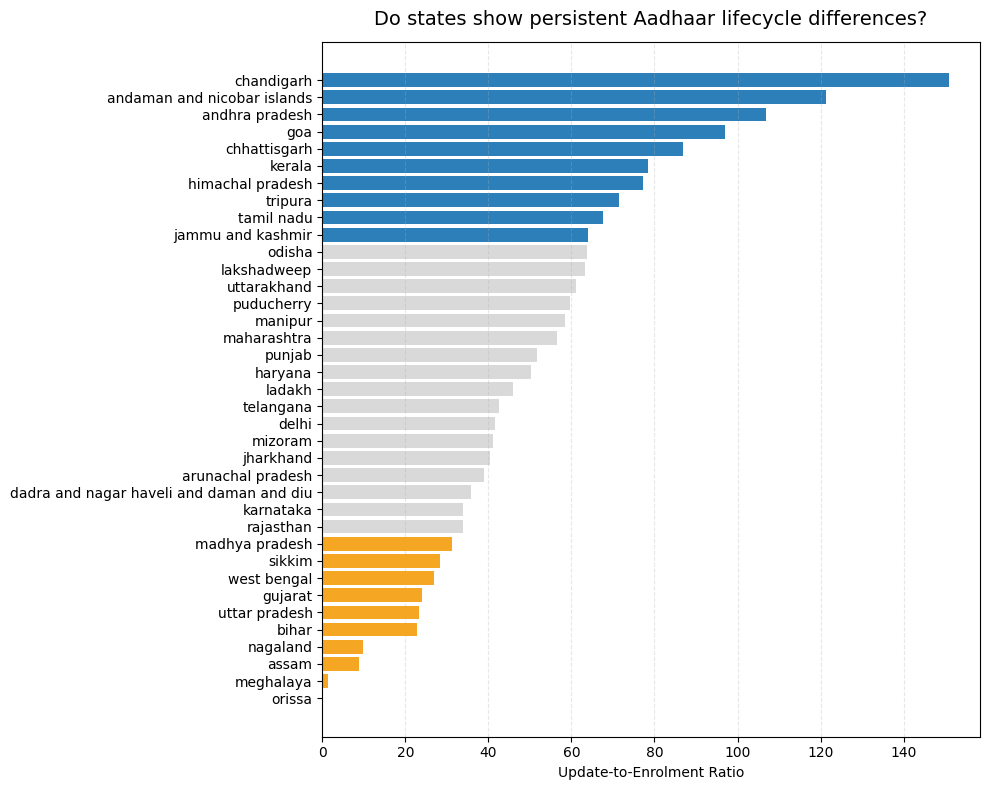

In [ ]:

high_cutoff = df_lifecycle["update_to_enrolment_ratio"].quantile(0.75)
low_cutoff = df_lifecycle["update_to_enrolment_ratio"].quantile(0.25)

df_lifecycle["lifecycle_stage"] = "Transition"
df_lifecycle.loc[
    df_lifecycle["update_to_enrolment_ratio"] >= high_cutoff,
    "lifecycle_stage"
] = "Maintenance-heavy"

df_lifecycle.loc[
    df_lifecycle["update_to_enrolment_ratio"] <= low_cutoff,
    "lifecycle_stage"
] = "Growth-heavy"

df_plot = df_lifecycle.sort_values("update_to_enrolment_ratio")

# Colors
STAGE_COLORS = {
    "Growth-heavy": "#f5a623",       # Aadhaar orange
    "Transition": "#d9d9d9",
    "Maintenance-heavy": "#2c7fb8"   # UIDAI blue
}

colors = df_plot["lifecycle_stage"].map(STAGE_COLORS)

plt.figure(figsize=(10, 8))

plt.barh(
    df_plot["state_clean"],
    df_plot["update_to_enrolment_ratio"],
    color=colors
)

plt.title(
    "Do states show persistent Aadhaar lifecycle differences?",
    fontsize=14,
    pad=12
)

plt.xlabel("Update-to-Enrolment Ratio")
plt.ylabel("")

plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()

plt.show()



# Supporting Observations (Validation & Coverage)



### Age-group stability across states


In [108]:
age_share = (
    state_month_enrol
    .groupby("state_clean", as_index=False)
    .agg(
        age_0_5=("age_0_5", "sum"),
        age_5_17=("age_5_17", "sum"),
        age_18_plus=("age_18_greater", "sum"),
        total=("total_enrolment", "sum")
    )
)

age_share["share_0_5"] = age_share["age_0_5"] / age_share["total"]
age_share["share_5_17"] = age_share["age_5_17"] / age_share["total"]
age_share["share_18_plus"] = age_share["age_18_plus"] / age_share["total"]

age_share[["share_0_5", "share_5_17", "share_18_plus"]].describe()


,share_0_5,share_5_17,share_18_plus
count,37.000000,37.000000,37.000000
mean,0.691856,0.268045,0.040099
std,0.190917,0.165883,0.053507
min,0.189086,0.037544,0.000000
25%,0.616830,0.159812,0.013297
50%,0.722785,0.202791,0.026546
75%,0.810737,0.309053,0.041413
max,0.949159,0.653215,0.310149


### Youth updates vs youth enrolments

In [109]:
youth_enrol = state_month_enrol["age_5_17"].sum()

youth_updates = (
    state_month_demo["demo_age_5_17"].sum() +
    state_month_bio["bio_age_5_17"].sum()
)

youth_enrol, youth_updates, youth_updates / youth_enrol


(940335, 30071172, 31.979211663928282)

### Biometric dominance over demographic updates

In [110]:
total_demo = (
    state_month_demo["demo_age_5_17"].sum() +
    state_month_demo["demo_age_17_"].sum()
)

total_bio = (
    state_month_bio["bio_age_5_17"].sum() +
    state_month_bio["bio_age_17_"].sum()
)

total_demo, total_bio, total_bio / (total_demo + total_bio)


(32471759, 55546293, 0.6310784178681891)

### Low variance outside January

In [111]:
monthly_totals = (
    state_month_enrol
    .groupby("month", as_index=False)
    .agg(total=("total_enrolment", "sum"))
)

monthly_totals["month"] = pd.to_datetime(monthly_totals["month"])

non_jan = monthly_totals[monthly_totals["month"].dt.month != 1]

non_jan["total"].std() / non_jan["total"].mean()


0.30462598317820794

### Small-state amplification effect

In [112]:
df_lifecycle["enrolment_quantile"] = pd.qcut(
    df_lifecycle["total_enrolment"],
    q=3,
    labels=["Small", "Medium", "Large"]
)

(
    df_lifecycle
    .groupby("enrolment_quantile")
    .agg(
        avg_ratio=("update_to_enrolment_ratio", "mean"),
        states=("state_clean", "count")
    )
)


C:\Users\Windows\AppData\Local\Temp\ipykernel_13780\1729039884.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("enrolment_quantile")


,avg_ratio,states
enrolment_quantile,,
Small,63.906755,13
Medium,59.651300,12
Large,30.936723,12
